In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from stockfish import Stockfish
import chess
import math
import random
from evaluation_pipeline_copy import *
from plot_functions import *
from scipy.special import rel_entr

import matplotlib.pyplot as plt
import chess.engine


In [2]:
df = pd.read_csv(r"chessData.csv")

data_random = generate_synthetic_data_dict(120,1,df,1)
data_ensemble = get_ensemble_output()
data_ensemble


['c4d5',
 'a7a8',
 'e3g5',
 'e6e8',
 'e7f8',
 'b5c6',
 'd7c5',
 'd5e6',
 'g5h7',
 'e4f5',
 'g4h6',
 'f1c4',
 'b3d5',
 'd4e6',
 'c6d7',
 'd8e7',
 'd1d6',
 'd3e2',
 'd5e6',
 'e4d5',
 'g5h7',
 'e3d4',
 'e2f4',
 'd2e4',
 'f8e7',
 'b2c3',
 'e7f8',
 'c5d7',
 'f8e8',
 'e2e8',
 'd4d8',
 'g8h8',
 'f5e4',
 'e7b7',
 'e1d1',
 'g4g5',
 'g6g5',
 None,
 'e6e5',
 'd6c8',
 'd4a4',
 'b6a8',
 'g6f4',
 'f6d7',
 'c1e3',
 'h8h7',
 'd3d4',
 'g6g5',
 'd8e7',
 'd6d5',
 'b4b5',
 'e6e5',
 'a6c8',
 'g2e4',
 'a3a4',
 'c7d7',
 'b7g2',
 'f6g4',
 'c3f6',
 'h3f4',
 'g6f7',
 'h6h5',
 'e6g6',
 'h7h5',
 'e6c8',
 'b5b3',
 'b2b4',
 'e2e1',
 'b6b2',
 'c1f4',
 'c8b7',
 'e2c3',
 'a7d4',
 'c8d7',
 'd3f1',
 'a1f1',
 'f3e1',
 'e1d2',
 'e3h6',
 'e3c1',
 'f5g4',
 'a8a3',
 'd3d7',
 'c6c2',
 'g1h1',
 'a6a5',
 'e6e5',
 'c3c4',
 'b1a1',
 'd2e2',
 'd1c1',
 'f6d5',
 'h1h2',
 'e8d7',
 'd1d2',
 'd5c7',
 'd8d7',
 'e6c4',
 'e8c8',
 'f5h3',
 'f6d7',
 'c8d7',
 'd1e2',
 'c6c5',
 'e2d4',
 'c8d7',
 'd3e3',
 'd7c6',
 'f1e1',
 'd3g3',
 'a8d8',
 'd

In [3]:
random_score = score(data_random, df)

In [4]:
print(type(data_ensemble))
ensemble_score = score(data_ensemble, df)

<class 'list'>


c:\Users\nunni\miniconda3\envs\venv-fagprojekt\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nunni\miniconda3\envs\venv-fagprojekt\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


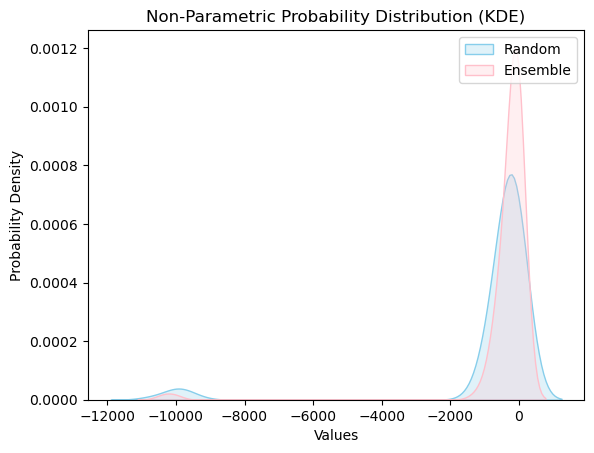

In [5]:
x_grid1, kde_values_random, x_grid2, kde_values_ensemble = distribution_plot(random_score, ensemble_score, label1= "Random", label2 = "Ensemble")

c:\Users\nunni\miniconda3\envs\venv-fagprojekt\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


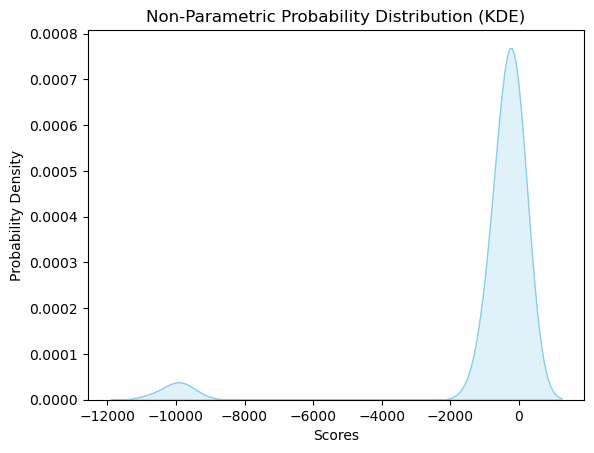

c:\Users\nunni\miniconda3\envs\venv-fagprojekt\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


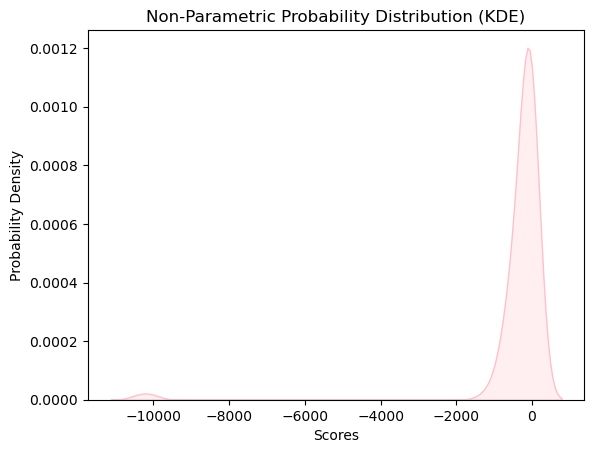

In [6]:
x_grid1, kde_values_random = distribution_plot(random_score)
x_grid2, kde_values_ensemble = distribution_plot(ensemble_score, color1 = "pink")

In [7]:
KL = sum(rel_entr(kde_values_random, kde_values_ensemble))
print(KL)

0.01458888763824895


In [8]:
stockfish_score = stockfish_score_function(120, df)

In [9]:
stockfish_score 

[-8,
 1,
 -2,
 -4,
 -80,
 16,
 -14,
 6,
 4,
 -1.0,
 -42,
 4,
 -4,
 -27.0,
 -30,
 -9,
 -19,
 -8,
 6,
 -7,
 -8,
 -5,
 -3,
 0,
 25,
 -16,
 -38,
 -10,
 -1e-06,
 -19,
 -15,
 -4,
 -5,
 8,
 -23.0,
 15,
 21,
 -60,
 -11,
 8,
 -3,
 -4,
 -13,
 -7,
 16,
 -1.0,
 1.0,
 -17,
 -12,
 -10,
 -6,
 -8,
 3,
 -18,
 -5.0,
 2.0,
 4.0,
 8,
 2,
 -21,
 -2.0,
 -7,
 -1,
 3,
 -4,
 -3,
 -2,
 -3,
 3,
 -3,
 1.0,
 -10,
 6,
 38,
 -2,
 3,
 10,
 -2,
 -7,
 -2,
 -26,
 -7,
 9,
 4,
 5.0,
 -9,
 0,
 6,
 -8,
 1,
 -9,
 2,
 0,
 -1,
 2,
 -20,
 -17,
 -13,
 -14,
 40,
 -8,
 0,
 1,
 39,
 3.0,
 0,
 12,
 16,
 -11,
 54,
 -19,
 -9,
 52,
 -15,
 -4,
 -19,
 -5,
 -7,
 5,
 -5]

In [10]:
categories = ['Below 25%',r'25%-50%', r'50%-75%', 'Above 75%']

counts_random = percentile_distribution(data_random, df)
counts_ensemble = percentile_distribution(data_ensemble, df)

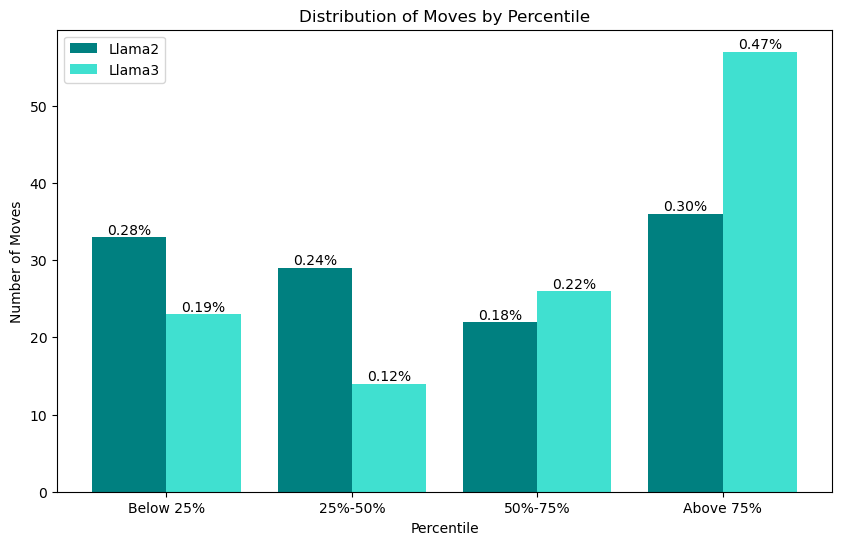

In [11]:
bar_plot(categories, [count/120 for count in counts_random], [count/120 for count in counts_ensemble], 120, 'Percentile', 'Number of Moves','Distribution of Moves by Percentile')